In [6]:
from hypermolecule_class import Hypermolecule
os.chdir(r'C:\Users\ehrma\Desktop\Coding\TSCoDe\Resources\bulk')
# test = Hypermolecule('10-deacetylbaccatin_iii.xyz')

FileNotFoundError: [WinError 3] Impossibile trovare il percorso specificato: 'C:\\Users\\ehrma\\Desktop\\Coding\\TSCoDe\\Resources\\bulk'

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
OHs = [4,6,7,3]

In [9]:
from cclib.io import ccread
data = ccread('10-deacetylbaccatin_iii.xyz')
def integral_steric_index(coords, index, thresh):
    '''
    '''
    distances = np.array([np.linalg.norm(coords[index]-coords[i]) for i in range(len(coords))])
    distances = np.sort(distances)
    distances = distances[distances < thresh]
    distances = 5-distances

    integral = np.sum([(distances[i]-distances[i-1])/2 + distances[i-1] for i in range(1,len(distances))])
    return distances, integral

integral_steric_index(data.atomcoords[0], 11, 5)

(array([], dtype=float64), 0.0)

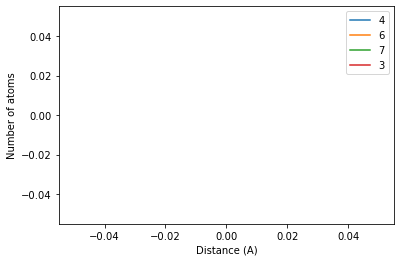

In [10]:
fig = plt.figure()
for index in OHs:
    x,_ = integral_steric_index(data.atomcoords[0], index, 5)
    plot = plt.plot(x, range(len(x)), label=index)
plt.legend()
plt.xlabel('Distance (A)')
plt.ylabel('Number of atoms')
plt.show()

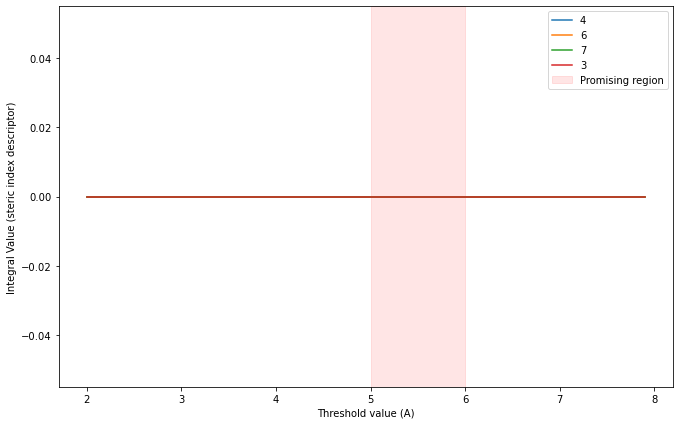

In [11]:
step = 0.1
range_ = np.arange(2,8,step)
# 1 for a smoother graph, 0.1 for a more detailed one

fig = plt.figure(figsize=(11,7))
for index in OHs:
    y = [integral_steric_index(data.atomcoords[0], index, thresh=thresh)[1] for thresh in range_]
    plot = plt.plot(range_, y, label=index)
plt.ylabel('Integral Value (steric index descriptor)')
plt.xlabel('Threshold value (A)')
plt.axvspan(5, 6, color='red', alpha=0.1, label='Promising region')
plt.legend()
plt.show()

Experimental reactivity order is **4,6,7,3**

Predicted order is correct for threshold values of about 4-5 angstroms, with more uncertainty for the least reactive centers.

Indeed, only the most reactive OH will react, and the resulting molecule may have a different score for each remaining OH

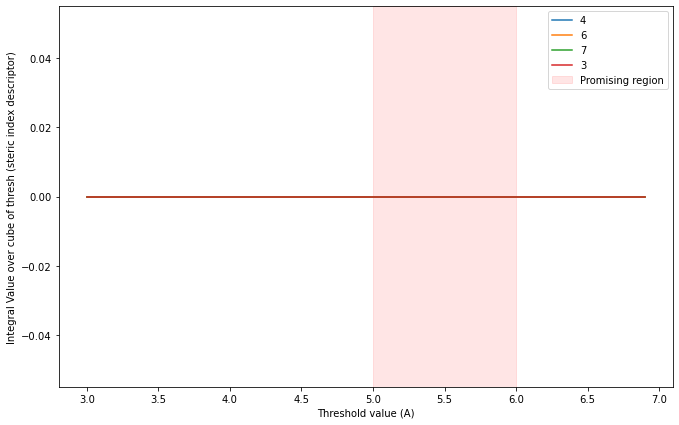

In [12]:
step = 0.1
range_ = np.arange(3,7,step)
# 1 for a smoother graph, 0.1 for a more detailed one

fig = plt.figure(figsize=(11,7))
for index in OHs:
    y = [integral_steric_index(data.atomcoords[0], index, thresh=thresh)[1]/thresh**3 for thresh in range_]
    plot = plt.plot(range_, y, label=index)
plt.ylabel('Integral Value over cube of thresh (steric index descriptor)')
plt.xlabel('Threshold value (A)')
plt.axvspan(5, 6, color='red', alpha=0.1, label='Promising region')
plt.legend()
plt.show()